In [159]:
#IMPORTS 
import sys
import numpy as np
import matplotlib.pyplot as plt
#sys.path.append(r"C:\Users\DGaard\Desktop\Gits\MoleculeSim\ownSim")
sys.path.append(r"C:\Users\EmilR\Documents\GitHub\MoleculeSim\ownSim")

#import forces as fc
import molecules as mc
import img3dto2d as i32
import util
import forces as fc
import molecules as mc
#import random
#import copy
from tqdm import tqdm
import scipy

In [160]:
# get box size relation to average molecule diameter
radius = 100
s_vol = (4/3)*np.pi*radius**3

print(np.cbrt(s_vol*1000*(1/0.13)))

3182.1092474458783


In [161]:
#setup universe
# Parameters for universe initialization
#box_const_size = 3800.
#box_size = np.array([box_const_size,box_const_size,box_const_size]) #max coordinate values for universe
num_molecules = 1000#1000#20
#other setup
#seed = 1414 #1313

#combs = grid_points(box_size, radius, spacing)
#molecules = [mc.Molecule(pos, radius) for pos in combs]

#force_func = custom_force1
#uni = mc.SimpleUniverse(box_size, len(molecules),np.repeat(radius,len(molecules)),seed, own_molecules = molecules, force_fun = cust_force)
#uni = mc.SimpleUniverse(box_size, num_molecules,radii,seed, force_fun = force_func)

In [162]:
def sphere_vol(radius):
  return (4/3)*np.pi*radius**3

In [163]:
def avg_sphere_vol(d):
  return util.pdf(d) * sphere_vol(d/2)

In [164]:
avg_sphere_area = scipy.integrate.quad(avg_sphere_vol, -0.0000000000001, np.infty)[0]
exp_box_area = num_molecules*avg_sphere_area*(1/0.13)
exp_box_dim = np.cbrt(exp_box_area)

In [165]:
print(exp_box_area)
print(exp_box_dim)

61709185093.65229
3951.6936622798657


In [114]:
print(sphere_vol(200))

33510321.638291124


In [166]:
box_const_size = exp_box_dim
box_size = np.array([box_const_size,box_const_size,box_const_size])
box_area = box_size[0] * box_size[1] * box_size[2]

In [167]:
vol_frac = []
seed = 1414
for i in tqdm(range(100)):
  #get 1000 radii from dist
  radii  = util.get_n_radii(num_molecules, seed = seed) 
  # get their volume fraction
  sphere_area = sum([sphere_vol(r) for r in radii])
  # print(sphere_area)
  # print(box_area)
  vol_frac.append(sphere_area/box_area)
  seed +=1

100%|██████████| 100/100 [04:02<00:00,  2.42s/it]


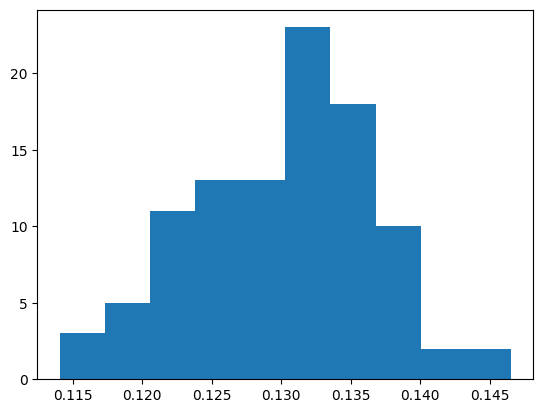

In [206]:
# plot stats
plt.figure()
plt.hist(vol_frac, bins = 10)
hist, edges = np.histogram(vol_frac, bins = 100, density = True)
bin_centers = (edges[:-1] + edges[1:]) / 2
# plt.plot(bin_centers, hist)
plt.show()

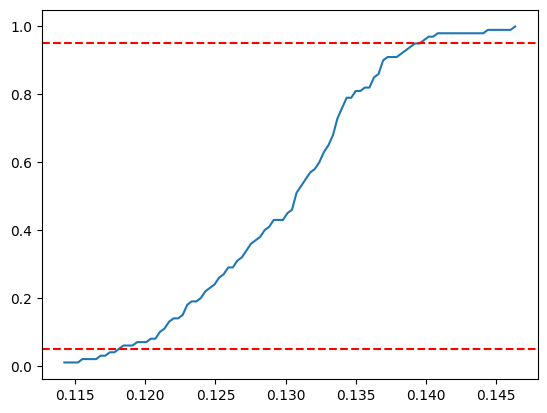

In [207]:
hist_norm = hist/sum(hist)
cum_hist = np.cumsum(hist_norm)

plt.figure()
plt.plot(bin_centers, cum_hist)
plt.axhline(y=0.05, color='r', linestyle='dashed')
plt.axhline(y=0.95, color='r', linestyle='dashed')
plt.show()


In [210]:
print(bin_centers[2], bin_centers[-3])

0.1148805675764684 0.14569758557290488


In [211]:
#test if we can create universe with this box size
seed = 1414
for i in range(10):

  uni = mc.SimpleUniverse(box_size, num_molecules,util.get_n_radii(num_molecules),seed = seed, force_fun = fc.total_force_molecule)
  seed +=1